**TextMine2023**
===

## 1 - Python and Data imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import re
from sklearn.metrics import f1_score

In [2]:
jdr_path = Path('JDR.json')
jdf_path = Path('JDF.json')

df_jdr = pd.read_json(jdr_path).set_index('identifier')
df_jdf = pd.read_json(jdf_path).set_index('identifier')
df_jdr

,text,annotations
identifier,,
500,Faustin Chabot\r\nAdresse : 19 rue Descartes 9...,"[{'form': 'Faustin', 'label': 'Human', 'begin'..."
501,Vallis Lachance\r\nConcepteur de publications ...,"[{'form': 'Vallis', 'label': 'Human', 'begin':..."
502,Archaimbau Masson\r\nChargé de Clientèle\r\nSe...,"[{'form': 'Archaimbau', 'label': 'Human', 'beg..."
503,Jeanette Fremont\r\n8 Rue Joseph Vernet 92220 ...,"[{'form': 'Jeanette', 'label': 'Human', 'begin..."
504,Cher Bazin\r\nMécanicienne auto / Répare ta ca...,"[{'form': 'Cher', 'label': 'Human', 'begin': 0..."
...,...,...
968,Claude Landry\nAdresse : 46 rue du Général Ail...,"[{'form': 'Claude', 'label': 'Human', 'begin':..."
969,Charlotte Bussière\n59 cours Jean Jaures 33300...,"[{'form': 'Charlotte', 'label': 'Human', 'begi..."
970,Cédric Garnier\n04.27.19.10.74 / cedricgarnier...,"[{'form': 'Cédric', 'label': 'Human', 'begin':..."


## 2 - Regex extraction 

In [3]:
# Dataset to work with
df = df_jdr.copy()


labels = [
    # 'Human', 'Organization', 'Function', 'Project', 'Location',
    'Reference_CEDEX', 'Reference_CS',
    'Reference_Code_Postal',
    'Phone_Number', 'Email', 
    'Url',
    # 'Social_Network',
    # 'Reference_User'
]

# for l in labels:
#     df[f'real_{l}'] = df['annotations'].apply(
#         lambda entities: [entity['form'] for entity in entities if entity['label'] == l]
#     )

df['pred_Phone_Number'] = df['text'].apply(
    lambda z: re.findall(r'(?:[+]\D?)?\d(?:\D{,2}\d){6,12}', z.replace(r'\n', '    '))
)
df['pred_Email'] = df['text'].apply(
    lambda z: re.findall(r'[\w\-\'\.]+@[\w\-]+[.]\w+', z.replace(r'\n', ' '))
)
df['pred_Url'] = df['text'].apply(
    lambda z: re.findall(r'\b[\w\-\.]+[.][a-zA-Z]{1,3}\b', z.replace(r'\n', ' '))
)
df['pred_Reference_Code_Postal'] = df['text'].apply(
    lambda z: [cp[1:6] for cp in re.findall(r'\D\d{5}\D', z.replace(r'\n', ' '))]
)
def get_Reference_CS(txt):
    list_CS = re.findall(r'CS.+?\d+', txt)
    if len(list_CS)==0:
        return []
    else:
        return ' '.join(list_CS).split(' ')
df['pred_Reference_CS'] = df['text'].apply(get_Reference_CS)

def get_Reference_CEDEX(txt):
    list_CEDEX = re.findall(r'cedex.+?\d+', txt, flags=re.IGNORECASE)
    if len(list_CEDEX)==0:
        return []
    else:
        return ' '.join(list_CEDEX).split(' ')
df['pred_Reference_CEDEX'] = df['text'].apply(get_Reference_CEDEX)

df.head()

,text,annotations,pred_Phone_Number,pred_Email,pred_Url,pred_Reference_Code_Postal,pred_Reference_CS,pred_Reference_CEDEX
identifier,,,,,,,,
500,Faustin Chabot\r\nAdresse : 19 rue Descartes 9...,"[{'form': 'Faustin', 'label': 'Human', 'begin'...",[+33 0134354919],[faustinchabot@teleworm.com],"[teleworm.com, fr.linkedin.com, teleworm.franc...","[94370, 12468]","[CS, 12468]","[Cedex, 9]"
501,Vallis Lachance\r\nConcepteur de publications ...,"[{'form': 'Vallis', 'label': 'Human', 'begin':...",[03.18.38.37.37],[vallislachance@monwax.com],"[monwax.com, monwax.com, www.facebook.com]","[60200, 10202]","[CS, 10202]","[Cedex, 12]"
502,Archaimbau Masson\r\nChargé de Clientèle\r\nSe...,"[{'form': 'Archaimbau', 'label': 'Human', 'beg...",[+ 03 81 20 48 27],[archaimbaumasson@dayrep.com],"[dayrep.com, www.facebook.com, dayrep.europe.com]","[51200, 99123]","[CS, 99123]","[Cedex, 3]"
503,Jeanette Fremont\r\n8 Rue Joseph Vernet 92220 ...,"[{'form': 'Jeanette', 'label': 'Human', 'begin...",[01.75.88.25.30],[jeanettefremont@smokingdirect.com],"[smokingdirect.com, SmokingDirect.fr, fr.linke...","[92220, 12603]","[CS, 12603]","[CEDEX, 6]"
504,Cher Bazin\r\nMécanicienne auto / Répare ta ca...,"[{'form': 'Cher', 'label': 'Human', 'begin': 0...",[+ 33 01 77 83 74 05],[cherbazin@gmail.com],"[ForwardYour.fr, gmail.com]","[97400, 33125]","[CS, 33125]","[Cedex, 6]"


In [11]:
# df_perf = df[[f'real_{l}' for l in labels]].copy()
# df_perf.columns = labels

# for l in labels:
#     df_perf[l] = df_perf[l] == df[f'pred_{l}']

# display(df_perf.head())
# print(f'{df_perf.sum()}')

# for l in labels:
#     print('\n', l)
#     display(df.loc[~df_perf[l], [f'real_{l}', f'pred_{l}']])

## 3 - Identify the tokens

In [4]:
df_tokens = pd.concat([
    pd.DataFrame(z).assign(identifier=i) for i, z in df['annotations'].items()]
)[['identifier', 'begin', 'end', 'form', 'label']].reset_index(drop=True)

# df_tokens['extended_form'] = df_tokens.groupby(['identifier', 'label'])['form'].transform(lambda z: ' '.join(z))
display(df_tokens.head())

# df_gt_short = df_tokens[['identifier', 'extended_form', 'label']].drop_duplicates().set_index('identifier')
# del df_gt['extended_form']
# df_gt_short = df_gt_short.pivot(columns='label')
# df_gt_short.columns = [c[1] for c in df_gt_short.columns] 

# print(f'{len(df_gt_short) = }')
# df_gt_short.head()

,identifier,begin,end,form,label
0,500,0,7,Faustin,Human
1,500,8,14,Chabot,Human
2,500,28,30,19,Location
3,500,31,34,rue,Location
4,500,35,44,Descartes,Location


In [9]:
# Add the predicted label for the regex-known labels

df_tokens['pred_label'] = None

def longest_common_substring(s1, s2):
    """ From https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Longest_common_substring#Python """
    m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
    longest = 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
            else:
                m[x][y] = 0
    return longest

def high_intersection_exists(form, possible_forms, threshold=.8):
    """
    returns:
        True if a high intersection exists between the given form and
        one of the possible forms (the one retrieve with regex expressions),
        False otherwise
    """
    a = len(form)
    for pf in possible_forms:
        i = longest_common_substring(form, pf)
        b = len(pf)
        if i / (a + b - i) > threshold:
            return True
    return False


for l in labels:
    pred_label_indices = df_tokens.apply(
        # lambda z: True if longest_common_substring(z.form, ' '.join(df.loc[z.identifier, f'pred_{l}'])) / len(z.form) > .5 else False,
        lambda z: high_intersection_exists(z.form, df.loc[z.identifier, f'pred_{l}']),
        axis=1
    )

    df_tokens.loc[pred_label_indices & pd.isnull(df_tokens['pred_label']), 'pred_label'] = l

df_tokens

,identifier,begin,end,form,label,pred_label
0,500,0,7,Faustin,Human,None
1,500,8,14,Chabot,Human,None
2,500,28,30,19,Location,None
3,500,31,34,rue,Location,None
4,500,35,44,Descartes,Location,None
...,...,...,...,...,...,...
6686,972,56,57,',Location,None
6687,972,57,62,Aigle,Location,None
6688,972,63,65,La,Location,None
6689,972,66,76,Possession,Location,None


In [21]:
df_tokens['pred_label'].value_counts(normalize=True, dropna=False)

None                     0.779704
Phone_Number             0.070841
Email                    0.044388
Reference_Code_Postal    0.040203
Url                      0.033926
Reference_CEDEX          0.022568
Reference_CS             0.008369
Name: pred_label, dtype: float64

## 4 - F1-score computation

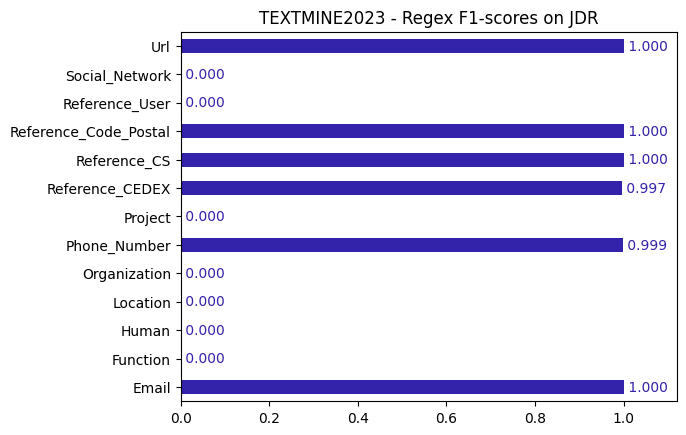

In [13]:
existing_labels = list(set(df_tokens['label']) | set(df_tokens[('pred_label')]))

f1_scores = pd.Series(
    f1_score(
        df_tokens['label'].map(dict(zip(existing_labels, range(len(existing_labels))))).values,
        df_tokens['pred_label'].map(dict(zip(existing_labels, range(len(existing_labels))))).values,
        average=None
    ),
    index=existing_labels
).sort_index()

ax = f1_scores.drop([None]).plot.barh(color='#32a')
for i, v in enumerate(f1_scores.drop([None])):
    plt.text(v, i, f' {v:.3f}', va='center', color='#32a')
plt.xlim(0, 1.12)
plt.title('TEXTMINE2023 - Regex F1-scores on JDR', fontsize=12)
plt.show()

In [14]:
df_tokens[
    ((df_tokens.label != df_tokens.pred_label) & ~pd.isnull(df_tokens.pred_label)) 
    | (df_tokens.label.isin(labels) & (df_tokens.label != df_tokens.pred_label))
]

,identifier,begin,end,form,label,pred_label
1071,549,81,83,12,Location,Reference_CEDEX
6591,966,66,74,249-1354,Location,Phone_Number


In [17]:
df.loc[966, 'text']

'Tânia Oliveira Lima\\nTél : (61) 95399206\\nAdresse : Quadra Quadra 249-1354, Luziânia-GO\\nUniverso Realtors'

In [18]:
df.loc[966, 'pred_Phone_Number']

['61) 95399206', '249-1354']

## Tests

In [7]:
def aggregate_neighboring_forms(begin, end, form):
    res = []
    subres = ''
    for next_b, e, f in zip(begin.shift(-1), end, form):
        subres += f
        if (next_b > e+1) or pd.isnull(next_b):
            res.append(subres)
            subres = ''
    return res

aggregate_neighboring_forms(a['begin'], a['end'], a['form'])

NameError: name 'df_gt' is not defined

In [151]:
# def aggregate_forms(begin, end, form):
    # lengths = np.array(end) - np.array(begin)
# 
    # return lengths
# 
# 
# aa = df_data[(df_data['id']==500)&(df_data['label']=='Location')]
# ' '.join(aa['form'])

0                             Faustin Chabot
1                             Faustin Chabot
2       19 rue Descartes Sucy-en-Brie France
3       19 rue Descartes Sucy-en-Brie France
4       19 rue Descartes Sucy-en-Brie France
                        ...                 
6686       76 rue de l ' Aigle La Possession
6687       76 rue de l ' Aigle La Possession
6688       76 rue de l ' Aigle La Possession
6689       76 rue de l ' Aigle La Possession
6690                      +33 02.65.53.52.03
Name: form, Length: 6691, dtype: object